In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random

# Problem 1

In [13]:
s1=pd.Series(-3,index=np.arange(2,12,2))
name=['Bill', 'Sarah', 'Jane', 'Joe']
age=['31','28','34','26']
s2=pd.Series(age, index=name)
s1,s2

(2    -3
 4    -3
 6    -3
 8    -3
 10   -3
 dtype: int64, Bill     31
 Sarah    28
 Jane     34
 Joe      26
 dtype: object)

# Problem 2

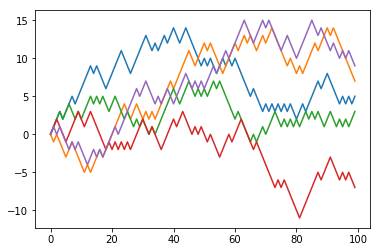

In [29]:
def randwalk(n):
    s=np.zeros(n)
    s[1:]=2*np.random.binomial(1,0.5,size=(n-1,))-1
    s=pd.Series(s)
    s=s.cumsum()
    return s
n=100
w1=randwalk(n)
w2=randwalk(n)
w3=randwalk(n)
w4=randwalk(n)
w5=randwalk(n)

plt.plot(w1)
plt.plot(w2)
plt.plot(w3)
plt.plot(w4)
plt.plot(w5)

plt.show()

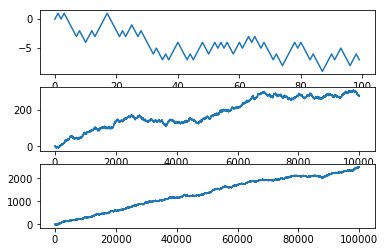

In [30]:
def biasedrandwalk(n):
    s=np.zeros(n)
    s[1:]=2*np.random.binomial(1,0.51,size=(n-1,))-1
    s=pd.Series(s)
    s=s.cumsum()
    return s
biasw1=biasedrandwalk(100)
biasw2=biasedrandwalk(10000)
biasw3=biasedrandwalk(100000)

plt.subplot(311)
plt.plot(biasw1)

plt.subplot(312)
plt.plot(biasw2)

plt.subplot(313)
plt.plot(biasw3)

plt.show()

# Problem 3

In [4]:
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})
studentInfo.loc[:,['Name','Age']]

,Name,Age
0,Mylan,20
1,Regan,21
2,Justin,18
3,Jess,22
4,Jason,19
5,Remi,20
6,Matt,20
7,Alexander,19
8,JeanMarie,20


In [70]:
studentInfo[(studentInfo['Age']>19) & (studentInfo['Sex']=='M')][['Name','ID']]

,Name,ID
0,Mylan,0
6,Matt,6


# Problem 4

In [11]:
pd.merge(otherInfo, studentInfo[(studentInfo['Sex']=='M')], on='ID')[['Age','GPA']]

,Age,GPA
0,20,3.8
1,18,3.0
2,19,2.8
3,20,3.8
4,19,3.4


# Problem 5

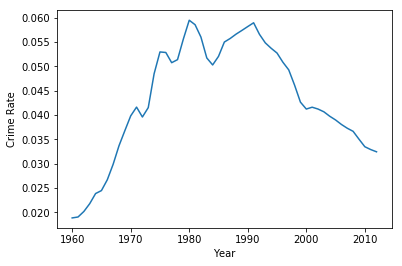

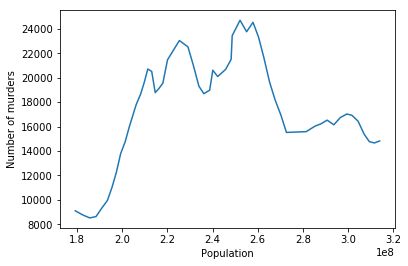

(10638068.075471697,
 2446286.2075471696,
       Population     Total  Violent  Property  Murder  Forcible-Rape  Robbery  \
 Year                                                                            
 1973   209851000   8718100   875910   7842200   19640          51400   384220   
 1974   211392000  10253400   974720   9278700   20710          55400   442400   
 
       Aggravated-assault  Burglary  Larcency-Theft  Vehicle-Theft  Crime Rate  
 Year                                                                           
 1973              420650   2565500         4347900         928800    0.041544  
 1974              456210   3039200         5262500         977100    0.048504  )

In [115]:
data=pd.read_csv('crime_data.txt').set_index('Year')
data['Crime Rate']=[int(t)/int(p) for t,p in zip(data['Total'],data['Population'])]

#plot crime rate vs year
plt.plot(data['Crime Rate'])
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.show()

#5 years with highest crime rates in descending order:
topcrime=data.sort_values('Crime Rate',ascending=False)['Crime Rate'][:5]

#mean of total and burglar:
totalmean=np.mean(data['Total'])
burglarmean=np.mean(data['Burglary'])

#years in which total is below average but burglary is above average
specialyear=data[(data['Total']<totalmean) & (data['Burglary']>burglarmean)]

#plot murder vs population
plt.plot(data['Population'], data['Murder'])
plt.xlabel('Population')
plt.ylabel('Number of murders')
plt.show()

#save crime_subset:
data.reindex(index=range(1980,1990,1), columns=['Population', 'Violent','Robbery']).to_csv('crime_subset.txt')

totalmean, burglarmean, specialyear